## DEGs for non-naive CD4 T cell population at single cell level

In [1]:

# load libraries
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library(tidyverse)
quiet_library(Seurat)
quiet_library(ggplot2)
quiet_library(Matrix)
quiet_library(dplyr)
quiet_library(viridis)
quiet_library(harmony)
quiet_library(future)
quiet_library(future.apply)
quiet_library(SingleCellExperiment)
quiet_library(SeuratDisk)
quiet_library(ggpubr)
quiet_library(knitr)
quiet_library(plotly)
quiet_library(lme4)
quiet_library(ggpubr)
quiet_library(ggrepel)
quiet_library(ggthemes)
options(warn = -1)

In [2]:
# Check number of cores
future::availableCores()
# Set up parallel processing to run when using 'future' functions 
future::plan(strategy = "multicore", workers = future::availableCores()-5)  
options(future.globals.maxSize = 1000 * 1024^3)
# to turn off parallel processing run line below
# future::plan(strategy = "sequential")

system 
    64

In [3]:
# define the color palette to be used
npg_color <- c("#E64B35FF", "#4DBBD5FF", "#00A087FF", "#3C5488FF", "#F39B7FFF", 
               "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF")
nejm_color <- c("#BC3C29FF", "#0072B5FF", "#E18727FF", "#20854EFF", "#7876B1FF", "#6F99ADFF", "#FFDC91FF", "#EE4C97FF")
jama_color <- c("#374E55FF", "#DF8F44FF", "#00A1D5FF", "#B24745FF", "#79AF97FF", "#6A6599FF", "#80796BFF")
jco_color <- c("#0073C2FF", "#EFC000FF", "#868686FF", "#CD534CFF", "#7AA6DCFF", "#003C67FF", "#8F7700FF")
cluster_colors <- c("#DC050C", "#FB8072", "#1965B0", "#7BAFDE", "#882E72", "#B17BA6", "#FF7F00", "#FDB462", "#E7298A", 
    "#E78AC3", "#33A02C", "#B2DF8A", "#55A1B1", "#8DD3C7", "#A6761D", "#E6AB02", "#7570B3", "#BEAED4", "#666666", "#999999", 
    "#aa8282", "#d4b7b7", "#8600bf", "#ba5ce3", "#808000", "#aeae5c", "#1e90ff", "#00bfff", "#56ff0d", "#ffff00")
coolors_clrs<-c("#EFB0A1","#009FF5","#1A5E9B","#42E2B8","#4ECDC4","#89B6A5","#F1D26A","#D5B0AC","#EDABB1","#02504D","#AA9674","#E64B35FF","#4DBBD5FF","#00A087FF")

cluster_colors_ext <- colorRampPalette(cluster_colors)(36)
options(repr.plot.width =5, repr.plot.height =5)

In [4]:
fig_path="/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_files/Certpro_figures/Plots_for_manuscript/"

In [5]:
degs_C3=read.csv("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/certpro/output_files/CD4T_mem_certpro_DEGs_wilcoxon_res_0.4_CLUSTER_3_Filtered_vs_Rest_py.csv")
degs_C3%>%head()
degs_C3%>%dim

,X,names,scores,logfoldchanges,pvals,pvals_adj,direction
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0,LIMS1,173.4471,2.0587560,0,0,up
2,1,FYB1,125.4221,0.9869149,0,0,up
3,2,KLRB1,119.8633,1.7975423,0,0,up
4,3,MAF,117.4443,1.7790763,0,0,up
5,33537,RPS3,-117.3739,-0.3322848,0,0,down
6,4,NEAT1,116.6669,1.2802397,0,0,up


[1] 33538     7

In [6]:
degs_C3 <- degs_C3 %>%
  rename(
    log2FoldChange = logfoldchanges,
    p.value = pvals,
    padj = pvals_adj,
    gene=names
  )
degs_C3%>%head(3)

,X,gene,scores,log2FoldChange,p.value,padj,direction
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0,LIMS1,173.4471,2.0587560,0,0,up
2,1,FYB1,125.4221,0.9869149,0,0,up
3,2,KLRB1,119.8633,1.7975423,0,0,up


In [7]:
# Replace zeros with a small constant in the 'pvals' column
degs_C3$padj <- ifelse(degs_C3$padj== 0, min(degs_C3$padj[degs_C3$padj > 0]), degs_C3$padj)

In [8]:
genes_to_plot1 =c('CD3D','RORA','MAF','TCF7','IL6ST','CD28','CD3G','STAT5B','CASP8','TRAF5',
                 'ICOS','CD247','NFAT5','STAT2','IKBKB','STIM1','FOSB','NKFB1','STAT6','PDCD1',
                'CXCR5','KLRB1','CCR6')
filtered_df_gene <- degs_C3[degs_C3$gene %in% genes_to_plot1, ]
filtered_df_gene%>%head()
filtered_df_gene%>%dim

,X,gene,scores,log2FoldChange,p.value,padj,direction
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,2,KLRB1,119.86330,1.7975423,0,1.245888e-307,up
4,3,MAF,117.44431,1.7790763,0,1.245888e-307,up
33,11,TCF7,72.25082,0.6942860,0,1.245888e-307,up
62,27,CD28,61.00385,0.9477691,0,1.245888e-307,up
103,50,CD3D,52.25879,0.3146757,0,1.245888e-307,up
133,72,RORA,47.87342,0.6011627,0,1.245888e-307,up


[1] 22  7

In [9]:
filtered_df_gene

,X,gene,scores,log2FoldChange,p.value,padj,direction
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,2,KLRB1,119.86330,1.7975423,0.000000e+00,1.245888e-307,up
4,3,MAF,117.44431,1.7790763,0.000000e+00,1.245888e-307,up
33,11,TCF7,72.25082,0.6942860,0.000000e+00,1.245888e-307,up
62,27,CD28,61.00385,0.9477691,0.000000e+00,1.245888e-307,up
103,50,CD3D,52.25879,0.3146757,0.000000e+00,1.245888e-307,up
133,72,RORA,47.87342,0.6011627,0.000000e+00,1.245888e-307,up
164,96,IL6ST,43.99201,0.8202036,0.000000e+00,1.245888e-307,up
310,210,CD3G,32.96581,0.2286403,2.511711e-238,2.717348e-236,up
313,213,STAT5B,32.91799,0.6098852,1.215287e-237,1.302182e-235,up


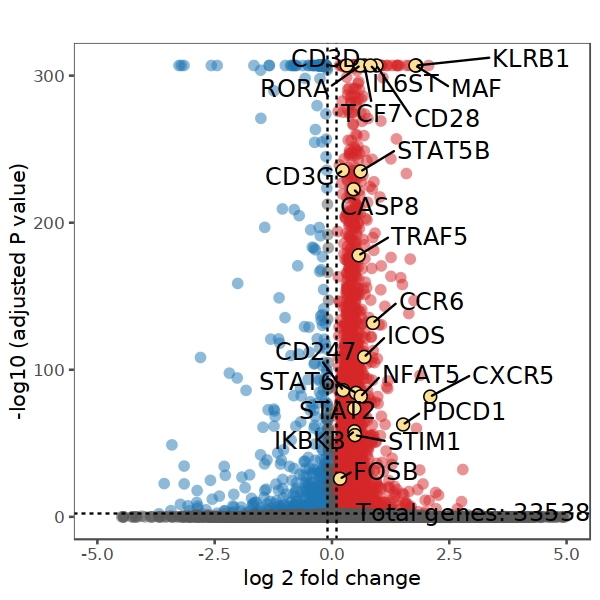

In [10]:
# Define the y-axis threshold for -log10(padj) significant threshold to be considered as significant gene is -log10(0.01) which is 2
y_threshold <- 2  
degs_C3 <- degs_C3 %>% mutate(
  sig_color1 = case_when(
    abs(log2FoldChange) < 0.1 | -log10(padj) < y_threshold ~ '#595959',
    log2FoldChange < 0.1 & -log10(padj) >= y_threshold ~ '#1f77b4', # blue
    log2FoldChange > 0.1 & -log10(padj) >= y_threshold ~ '#d62728', # red
    TRUE ~ 'grey'
  )
)

p1 <- ggplot(degs_C3, aes(x = log2FoldChange, y = -log10(padj), color = sig_color1)) +
  geom_point(size = 3, alpha = 0.5,stroke=0) +  # Adjust alpha for transparency
  geom_hline(yintercept = y_threshold, linetype = "dashed", color = "black") +
  geom_vline(xintercept = c(-0.1, 0.1), linetype = "dashed") +
  labs(x = "log 2 fold change", y = "-log10 (adjusted P value)", title = "") +
  theme_minimal() +
  geom_point(data = filtered_df_gene, aes(x = log2FoldChange, y = -log10(padj)), 
             fill = "#fee090", color = "black", size = 3, shape = 21, stroke = .5) +  # Yellow fill with black outline
  geom_text_repel(data = filtered_df_gene, aes(x = log2FoldChange, y = -log10(padj), label = gene),
                  hjust = -0.4, vjust = -0.7, size = 5, color = "black", segment.size = .5, segment.color = "black", force = 5, max.overlaps = 35, min.segment.length = 0)+
  scale_color_manual(values = c('#595959' = '#595959', '#d62728' = '#d62728', '#1f77b4' = '#1f77b4')) +
  theme_few() +
  theme(
    legend.position = "none",
  #   panel.grid.major = element_blank(),  # Remove major grid lines
  #   panel.grid.minor = element_blank()   # Remove minor grid lines
  ) +
  annotate("text", x = Inf, y = -Inf, label = paste("Total genes:", nrow(degs_C3)), hjust = 1, vjust = -1,
           color = "black", size = 5) +
  xlim(-5, 5)

print(p1)
ggsave("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_files/Certpro_figures/Plots_for_manuscript/Fig_4G.pdf", plot = p1, width = 5, height = 5, units = "in")

In [11]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/jupyter/libs/r_scrna/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggthemes_5.1.0              ggrepel_0.9.5              
 [3] lme4_1.1-34                 plotly_4.10.4              
 [5] knitr_1.47                  ggpubr_0.6.0               
 [7] SeuratDisk_0.0.0.9021       SingleCellExperiment_1.22.0
 [9] SummarizedExperiment_1.30.2 Biobas